In [ ]:
!pip install scikit-learn

In [ ]:
!pip install matplotlib

In [6]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

#### Load the Dataset

In [7]:
usa_housing_df = pd.read_csv('USA_Housing.csv')
usa_housing_df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.46,5.68,7.01,4.09,23086.80,1059033.56,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64,6.00,6.73,3.09,40173.07,1505890.91,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.07,5.87,8.51,5.13,36882.16,1058987.99,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24,7.19,5.59,3.26,34310.24,1260616.81,USS Barnett\nFPO AP 44820
4,59982.20,5.04,7.84,4.23,26354.11,630943.49,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94,7.83,6.14,3.46,22837.36,1060193.79,USNS Williams\nFPO AP 30153-7653
4996,78491.28,7.00,6.58,4.02,25616.12,1482617.73,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.69,7.25,4.81,2.13,33266.15,1030729.58,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33,5.53,7.13,5.44,42625.62,1198656.87,USS Wallace\nFPO AE 73316


In [8]:
usa_housing_df.count()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms    5000
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64

In [9]:
usa_housing_df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [10]:
usa_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [11]:
usa_housing_df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,68583.11,5.98,6.99,3.98,36163.52,1232072.65
std,10657.99,0.99,1.01,1.23,9925.65,353117.63
min,17796.63,2.64,3.24,2.00,172.61,15938.66
25%,61480.56,5.32,6.30,3.14,29403.93,997577.14
50%,68804.29,5.97,7.00,4.05,36199.41,1232669.38
75%,75783.34,6.65,7.67,4.49,42861.29,1471210.20
max,107701.75,9.52,10.76,6.50,69621.71,2469065.59


In [12]:
usa_housing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.00,68583.11,10657.99,17796.63,61480.56,68804.29,75783.34,107701.75
Avg. Area House Age,5000.00,5.98,0.99,2.64,5.32,5.97,6.65,9.52
Avg. Area Number of Rooms,5000.00,6.99,1.01,3.24,6.30,7.00,7.67,10.76
Avg. Area Number of Bedrooms,5000.00,3.98,1.23,2.00,3.14,4.05,4.49,6.50
Area Population,5000.00,36163.52,9925.65,172.61,29403.93,36199.41,42861.29,69621.71
Price,5000.00,1232072.65,353117.63,15938.66,997577.14,1232669.38,1471210.20,2469065.59


In [13]:
usa_housing_df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.46,5.68,7.01,4.09,23086.80,1059033.56,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64,6.00,6.73,3.09,40173.07,1505890.91,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.07,5.87,8.51,5.13,36882.16,1058987.99,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24,7.19,5.59,3.26,34310.24,1260616.81,USS Barnett\nFPO AP 44820
4,59982.20,5.04,7.84,4.23,26354.11,630943.49,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94,7.83,6.14,3.46,22837.36,1060193.79,USNS Williams\nFPO AP 30153-7653
4996,78491.28,7.00,6.58,4.02,25616.12,1482617.73,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.69,7.25,4.81,2.13,33266.15,1030729.58,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33,5.53,7.13,5.44,42625.62,1198656.87,USS Wallace\nFPO AE 73316


In [14]:
usa_housing_df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

#### Separate Features from the Label

In [15]:
X = usa_housing_df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.46,5.68,7.01,4.09,23086.80
1,79248.64,6.00,6.73,3.09,40173.07
2,61287.07,5.87,8.51,5.13,36882.16
3,63345.24,7.19,5.59,3.26,34310.24
4,59982.20,5.04,7.84,4.23,26354.11
...,...,...,...,...,...
4995,60567.94,7.83,6.14,3.46,22837.36
4996,78491.28,7.00,6.58,4.02,25616.12
4997,63390.69,7.25,4.81,2.13,33266.15
4998,68001.33,5.53,7.13,5.44,42625.62


In [16]:
y = usa_housing_df['Price']
y

0      1059033.56
1      1505890.91
2      1058987.99
3      1260616.81
4       630943.49
          ...    
4995   1060193.79
4996   1482617.73
4997   1030729.58
4998   1198656.87
4999   1298950.48
Name: Price, Length: 5000, dtype: float64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [18]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1840,55245.34,3.97,8.96,4.38,43557.94
2115,62305.64,6.49,7.65,3.19,47066.62
4437,77345.47,5.41,8.24,3.11,26706.91
1146,65846.17,6.39,6.80,3.18,28214.36
2486,69350.79,6.91,8.29,4.29,36779.06
...,...,...,...,...,...
4426,76223.56,6.37,5.34,2.42,30165.34
466,56685.01,6.96,7.50,3.38,43322.17
3092,66195.34,6.51,6.61,3.14,37288.92
3772,58694.52,7.39,9.27,4.32,49960.98


In [19]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1501,61907.59,7.02,6.44,3.25,43828.95
2586,57160.20,6.89,6.92,3.13,43467.15
2653,70190.80,6.75,6.66,2.01,29215.14
1055,69316.80,6.30,7.87,4.28,24448.21
705,72991.48,3.41,6.49,2.48,50626.50
...,...,...,...,...,...
3563,74208.12,6.26,8.67,3.38,25507.34
1538,71112.35,5.61,7.42,4.26,24134.41
1837,63665.39,6.73,7.73,3.43,44029.68
2380,56073.89,6.58,6.96,4.40,64149.68


In [20]:
y_train

1840    881446.12
2115   1375771.13
4437   1137069.31
1146    928950.00
2486   1392083.82
          ...    
4426   1023943.78
466    1223100.54
3092   1318597.71
3772   1708631.37
860    1060897.69
Name: Price, Length: 3500, dtype: float64

#### LinearRegression

In [21]:
usa_housing_model = LinearRegression()
usa_housing_model

LinearRegression()

In [22]:
usa_housing_model.fit(X_train, y_train) # Training process

LinearRegression()

In [23]:
usa_housing_model.intercept_

-2638673.4261902766

In [24]:
y_test

1501   1339096.08
2586   1251794.18
2653   1340094.97
1055   1431507.62
705    1042373.52
          ...    
3563   1348221.77
1538   1309937.40
1837   1472887.25
2380   1409762.12
1912   1009606.28
Name: Price, Length: 1500, dtype: float64

In [25]:
predictions = usa_housing_model.predict(X_test)
predictions

array([1308536.13592598, 1237122.72746455, 1243835.62817086, ...,
       1457119.79297219, 1483428.95309288, 1047510.59737212])

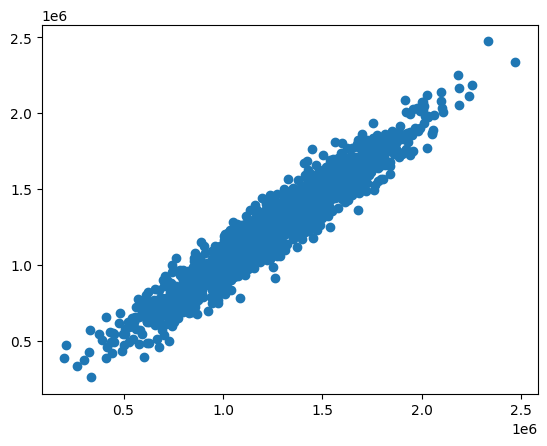

In [26]:
plt.scatter(y_test, predictions)

#### Predict for the following read details:
Features:86754.1966286121,6.604439818568124,6.252454805349369,4.02,43017.440757153636 \
Price: 1662494.7355443896

In [35]:
X_new = [[63876.0599100904,7.080219325540688,7.187432974886651,3.37,38052.87644316596]]
actual = 1388530.1566836066

prediction = usa_housing_model.predict(X_new)

print(f'Actual: {actual}')
print(f'Predicted: {prediction[0]}')

Actual: 1388530.1566836066
Predicted: 1363359.445858838


/home/coder/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### Save the Model

In [31]:
joblib.dump(value=usa_housing_model, filename='usa_housing_model.pkl')
print('Saved the usa_housing_model')

Saved the usa_housing_model


#### Load the model and use it for predictions

In [32]:
model = joblib.load('usa_housing_model.pkl')
print('Loaded the Model')

Loaded the Model


#### Do the predictions

In [34]:
X_new = [[63876.0599100904,7.080219325540688,7.187432974886651,3.37,38052.87644316596]]
actual = 1388530.1566836066

prediction = model.predict(X_new)

print(f'Actual: {actual}')
print(f'Predicted: {prediction[0]}')

Actual: 1388530.1566836066
Predicted: 1363359.445858838


/home/coder/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### Multiple predictions

In [39]:
X_new = [
            [79248.64, 6.00, 6.73, 3.09, 40173.07],
            [59982.20, 5.04, 7.84, 4.23, 26354.11],
            [65510.58, 5.99, 6.79, 4.07, 46501.28]
        ]

actual = [1505890.91, 630943.49, 1298950.48 ]

predictions = model.predict(X_new)

print(actual)
print(predictions)

[1505890.91, 630943.49, 1298950.48]
[1493717.64145693  843521.86518189 1300762.47703376]


/home/coder/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


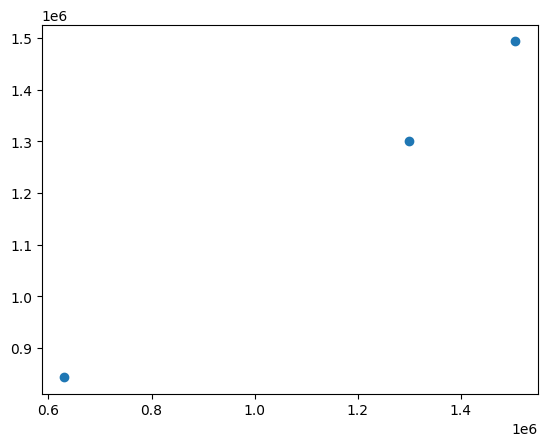

In [41]:
plt.scatter(actual,predictions)